# Explore the ODC-TBI Harmonized Preclinical Dataset with `mlcroissant`

## Introduction
This dataset, from Gold et al. (2024), provides a harmonized, multi-site collection of diffusion tensor imaging (DTI) MRI data from a preclinical rat model of traumatic brain injury (TBI). It addresses a key challenge in neuroimaging: the variability introduced by different imaging sites and acquisition protocols. Using the NeuroCombat harmonization technique, the authors corrected for site effects, enabling more robust and reproducible analyses of TBI-related brain changes.

Learn more:
- FAIR² Data Package: [10.71728/senscience.g7x2-a9k4](https://sen.science/doi/10.71728/senscience.g7x2-a9k4)

As a FAIR² Data Package, it ensures accessibility, interoperability, and AI-readiness. FAIR² datasets follow the MLCommons **Croissant** 🥐 format for machine learning datasets. See the [MLCommons Croissant Format Specification](https://docs.mlcommons.org/croissant/docs/croissant-spec.html).

This notebook provides a step-by-step guide for loading the dataset using the `mlcroissant` Python library and recreating some of the key analyses from the data article.

### Install and import required libraries

In [ ]:
# Install mlcroissant from the source
!sudo apt-get install python3-dev graphviz libgraphviz-dev pkg-config
!pip install mlcroissant[dev]

In [1]:
import mlcroissant as mlc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tabulate import tabulate
from IPython.display import Markdown, display

## 1. Data Loading
Load metadata and records from the dataset. This notebook uses a local copy of the Croissant metadata file (`fair2.json`), which in turn points to the local data file (`odc-tbi_1342.csv`). **Please ensure both files are in the same directory as this notebook.**

In [ ]:
# Provide the local path to the dataset's metadata file
croissant_file_path = 'https://sen.science/doi/10.71728/senscience.g7x2-a9k4/fair2.json'

# Load the dataset metadata
dataset = mlc.Dataset(croissant_file_path)
metadata = dataset.metadata.to_json()
print(f"{metadata['name']}: {metadata['description']}")

  -  [Metadata(Harmonized Multi-Site Diffusion MRI Dataset of Fractional Anisotropy, Diffusivity, and Atrophy Measures Following Controlled Cortical Impact in Male and Female Rats)] Property "http://mlcommons.org/croissant/citeAs" is recommended, but does not exist.
  -  [Metadata(Harmonized Multi-Site Diffusion MRI Dataset of Fractional Anisotropy, Diffusivity, and Atrophy Measures Following Controlled Cortical Impact in Male and Female Rats)] Property "https://schema.org/datePublished" is recommended, but does not exist.
  -  [Metadata(Harmonized Multi-Site Diffusion MRI Dataset of Fractional Anisotropy, Diffusivity, and Atrophy Measures Following Controlled Cortical Impact in Male and Female Rats)] Property "https://schema.org/version" is recommended, but does not exist.


Harmonized Multi-Site Diffusion MRI Dataset of Fractional Anisotropy, Diffusivity, and Atrophy Measures Following Controlled Cortical Impact in Male and Female Rats: This dataset captures diffusion-weighted MRI data from a multi-site controlled cortical impact (CCI) model of traumatic brain injury (TBI) in Sprague Dawley rats. Collected at four institutions, the dataset includes harmonized scalar diffusion volumes (FA, MD, AD, RD), anatomical deformation metrics, and site-stratified metadata across 343 imaging sessions. It supports research on neuroimaging biomarkers, injury classification, and reproducible preclinical model validation. Data processing follows a standardized pipeline using BrkRaw, FSL, MRtrix3, and ANTs, with harmonization via NeuroCombat and voxel-level registration. Provenance is tracked using PROV-O and structured metadata.


## 2. Data Overview

In the **Croissant** format, a `RecordSet` represents a structured collection of records. It defines the structure of these records using a set of fields, such as the columns in our CSV file.

### 2.1 Review available RecordSets

In [7]:
# List all the record sets available in the dataset
df_record_sets = pd.DataFrame(metadata["recordSet"])
columns_to_keep = {
    "@id": "Record Set ID",
    "description": "Description"
}
df_record_sets = df_record_sets[list(columns_to_keep.keys())]
df_record_sets = df_record_sets.rename(columns=columns_to_keep)

# Convert DataFrame to Markdown table
markdown_table = tabulate(df_record_sets, headers="keys", tablefmt="pipe", showindex=False)

# Render the table as Markdown in Jupyter
display(Markdown(markdown_table))

| Record Set ID                                                                 | Description                                                                                                            |
|:------------------------------------------------------------------------------|:-----------------------------------------------------------------------------------------------------------------------|
| https://sen.science/doi/10.71728/senscience.g7x2-a9k4/recordsets/odc-tbi_1342 | Diffusion MRI scalar volumes and metadata from rats imaged after CCI or sham procedures, harmonized across four sites. |

## 3. Data Extraction and Preparation

We will load the data from the primary record set into a pandas DataFrame for analysis.

In [11]:
prefix = "https://sen.science/doi/10.71728/senscience.g7x2-a9k4/record-sets/odc-tbi_1342/fields/"
df.columns = [col.replace(prefix, "") if col.startswith(prefix) else col for col in df.columns]

# Display the first few rows and schema of the dataframe
display(Markdown(f"### First 5 rows of the `{record_set_id}` RecordSet"))
display(df.head())

display(Markdown("### DataFrame Information"))
df.info()

### First 5 rows of the `https://sen.science/doi/10.71728/senscience.g7x2-a9k4/recordsets/odc-tbi_1342` RecordSet

,subjectid,other_id,animal_id,speciestyp,speciesstraintyp,bodywgtmeasrval,sextyp,injgroupassigntyp,tbimodeltyp,injelapsedtime,...,unharmonized_low_rd_volume,unharmonized_high_rd_volume,harmonized_low_rd_volume,harmonized_high_rd_volume,voxel_harmonized_low_rd_volume,voxel_harmonized_high_rd_volume,unharmonized_low_fa_volume_4site,unharmonized_high_fa_volume_4site,harmonized_low_fa_volume_4site,harmonized_high_fa_volume_4site
0,b'UH3_CCI_UCLA_2',b'2',b'2',b'Rat',b'Sprague-Dawley',306.0,b'Male',b'CCI',b'CCI',b'd03',...,1.953125,13.265625,1.083696,11.410333,0.875000,11.609375,0.218750,2.296875,0.790288,5.132617
1,b'UH3_CCI_UCLA_2',b'2',b'2',b'Rat',b'Sprague-Dawley',306.0,b'Male',b'CCI',b'CCI',b'd30',...,7.406250,44.203125,6.536821,42.347833,10.359375,37.718750,1.046875,3.890625,1.618413,6.726367
2,b'UH3_CCI_UCLA_3',b'3',b'3',b'Rat',b'Sprague-Dawley',309.0,b'Male',b'CCI',b'CCI',b'd03',...,2.140625,9.765625,1.271196,7.910333,1.953125,8.328125,0.125000,4.000000,0.696538,6.835742
3,b'UH3_CCI_UCLA_3',b'3',b'3',b'Rat',b'Sprague-Dawley',309.0,b'Male',b'CCI',b'CCI',b'd30',...,12.250000,15.234375,11.380571,13.379083,17.703125,12.578125,0.046875,13.500000,0.618413,16.335742
4,b'UH3_CCI_UCLA_4',b'4',b'4',b'Rat',b'Sprague-Dawley',314.0,b'Male',b'CCI',b'CCI',b'd03',...,6.609375,18.078125,5.739946,16.222833,3.781250,15.859375,0.156250,5.906250,0.727788,8.741992


### DataFrame Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   subjectid                          343 non-null    object 
 1   other_id                           343 non-null    object 
 2   animal_id                          343 non-null    object 
 3   speciestyp                         343 non-null    object 
 4   speciesstraintyp                   343 non-null    object 
 5   bodywgtmeasrval                    343 non-null    float64
 6   sextyp                             343 non-null    object 
 7   injgroupassigntyp                  343 non-null    object 
 8   tbimodeltyp                        240 non-null    object 
 9   injelapsedtime                     343 non-null    object 
 10  location                           343 non-null    object 
 11  locationnumber                     343 non-null    float64

The dataframe contains subject identifiers, experimental variables (`site`, `group`, `sex`, `timepoint_days`), and a large number of DTI metrics for various brain regions. The metrics prefixed with `combat_` are the values that have been harmonized across sites.

## 4. Exploratory Data Analysis (EDA)

Now we will perform an EDA to understand the dataset's structure and replicate key findings from the data article.

### 4.1 Study Design Overview
First, let's summarize the distribution of subjects across the different experimental factors, as shown in Figure 2 of the data article.

In [13]:
display(Markdown("#### Subject Counts by Site and Group"))
design_summary = df.groupby(['location', 'injgroupassigntyp'])['subjectid'].nunique().unstack()
display(design_summary)

display(Markdown("#### Subject Counts by Timepoint and Group"))
timepoint_summary = df.groupby(['injelapsedtime', 'injgroupassigntyp'])['subjectid'].nunique().unstack()
display(timepoint_summary)

#### Subject Counts by Site and Group

injgroupassigntyp,b'CCI',b'SHM'
location,,
b'UCLA',33,17
b'UF',27,11
b'UJHU',35,14
b'USUHS',33,16


#### Subject Counts by Timepoint and Group

injgroupassigntyp,b'CCI',b'SHM'
injelapsedtime,,
b'd03',122,50
b'd30',118,53


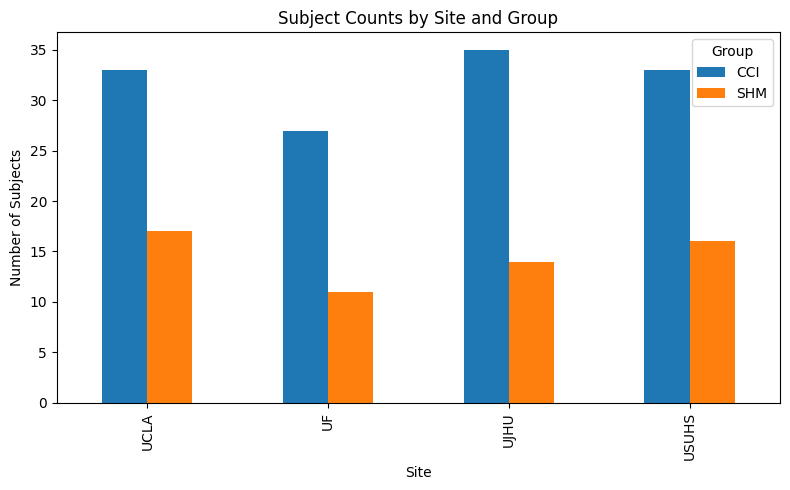

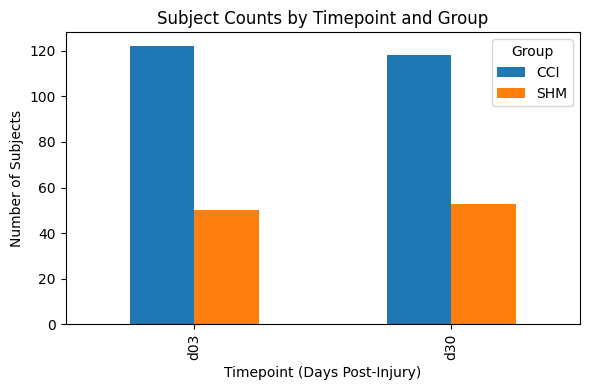

In [24]:
# Convert index and columns from bytes to strings for plotting
def decode_bytes(val):
    return val.decode() if isinstance(val, bytes) else val

design_summary_plot = design_summary.copy()
design_summary_plot.index = [decode_bytes(idx) for idx in design_summary_plot.index]
design_summary_plot.columns = [decode_bytes(col) for col in design_summary_plot.columns]

timepoint_summary_plot = timepoint_summary.copy()
timepoint_summary_plot.index = [decode_bytes(idx) for idx in timepoint_summary_plot.index]
timepoint_summary_plot.columns = [decode_bytes(col) for col in timepoint_summary_plot.columns]

# Plot the design_summary table as a grouped bar chart
fig1, ax1 = plt.subplots(figsize=(8, 5))
design_summary_plot.plot(kind='bar', ax=ax1)
ax1.set_title('Subject Counts by Site and Group')
ax1.set_xlabel('Site')
ax1.set_ylabel('Number of Subjects')
ax1.legend(title='Group')
plt.tight_layout()
plt.show()

# Plot the timepoint_summary table as a grouped bar chart
fig2, ax2 = plt.subplots(figsize=(6, 4))
timepoint_summary_plot.plot(kind='bar', ax=ax2)
ax2.set_title('Subject Counts by Timepoint and Group')
ax2.set_xlabel('Timepoint (Days Post-Injury)')
ax2.set_ylabel('Number of Subjects')
ax2.legend(title='Group')
plt.tight_layout()
plt.show()

### 4.2 Analysis of Data Harmonization (Replicating Figure 3)

A key contribution of this dataset is the harmonization of data across three different sites. The data article shows that this process reduces site-specific variance that could otherwise confound analysis. 

Let's visualize this effect for Fractional Anisotropy (`FA`), a common DTI metric, in the Corpus Callosum—a brain region heavily affected by TBI. We will compare the data distribution before and after harmonization.

/var/folders/sr/rb0fdyrd6mj5vn4v5zcgw8vm0000gp/T/ipykernel_34680/3521755623.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], data=sham_df, x='location', y='unharmonized_high_fa_volume', palette='viridis')
/var/folders/sr/rb0fdyrd6mj5vn4v5zcgw8vm0000gp/T/ipykernel_34680/3521755623.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1], data=sham_df, x='location', y='harmonized_high_fa_volume', palette='viridis')


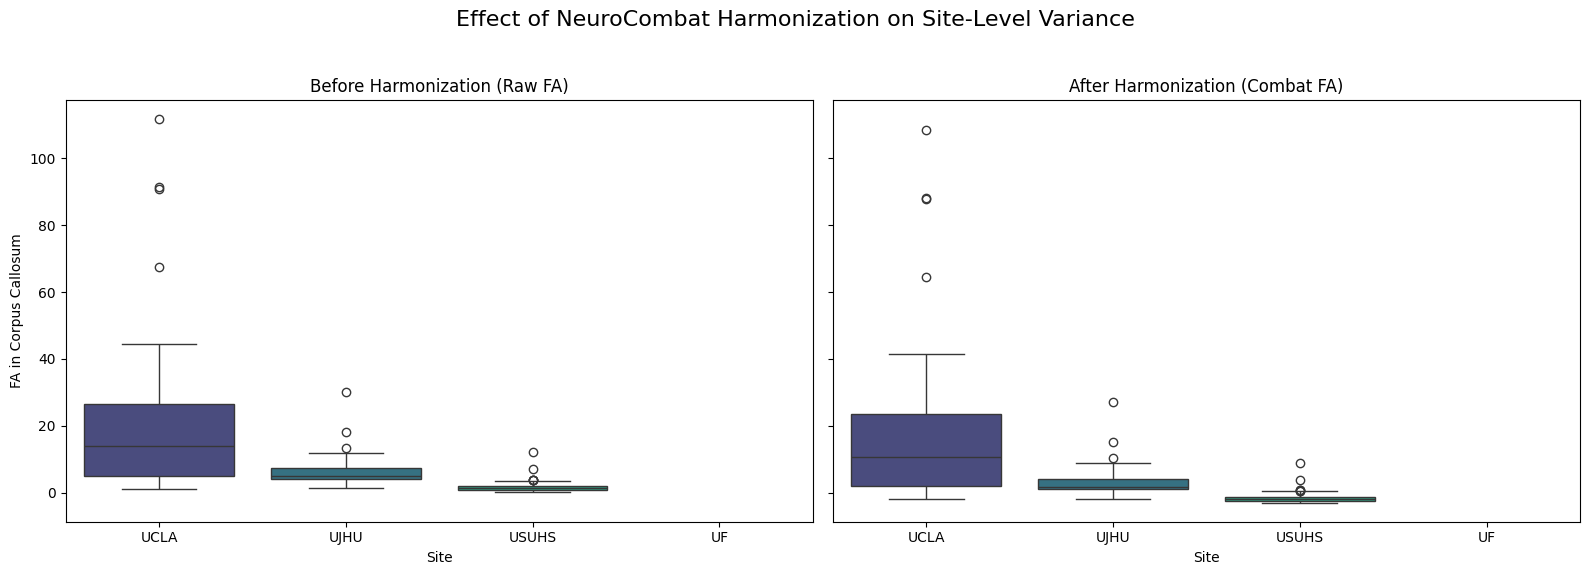

In [15]:
# We will focus on the sham group to see baseline site differences
sham_df = df[df['injgroupassigntyp'] == b'SHM']

# Set up the figure for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot 1: Before Harmonization
sns.boxplot(ax=axes[0], data=sham_df, x='location', y='unharmonized_high_fa_volume', palette='viridis')
axes[0].set_title('Before Harmonization (Raw FA)')
axes[0].set_xlabel('Site')
axes[0].set_ylabel('FA in Corpus Callosum')

# Plot 2: After Harmonization
sns.boxplot(ax=axes[1], data=sham_df, x='location', y='harmonized_high_fa_volume', palette='viridis')
axes[1].set_title('After Harmonization (Combat FA)')
axes[1].set_xlabel('Site')
axes[1].set_ylabel('') # Remove redundant y-axis label

fig.suptitle('Effect of NeuroCombat Harmonization on Site-Level Variance', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

As seen in the plots and described in the article, the distribution of the raw FA values shows significant differences between the sites (left plot). After applying the NeuroCombat harmonization algorithm, the distributions are much more aligned (right plot), indicating that site-specific technical variability has been successfully reduced.

### 4.3 Analysis of TBI Effects Over Time (Replicating Figure 4)

With the harmonized data, we can now confidently investigate the biological effects of TBI. The data article shows how DTI metrics change over time after injury. Let's examine the harmonized Radial Diffusivity (`RD`) in the Corpus Callosum, comparing the TBI group (`CCI`) to the control group (`sham`) at different timepoints.

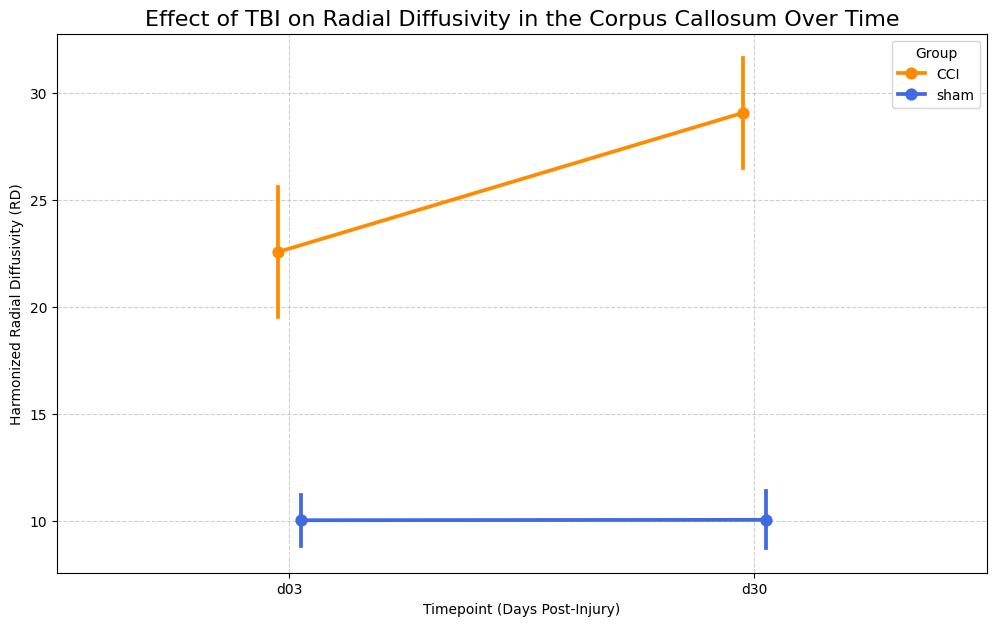

In [20]:
plt.figure(figsize=(12, 7))
sns.pointplot(
    data=df,
    x='injelapsedtime',
    y='harmonized_high_rd_volume',
    hue='group',
    palette={'sham': 'royalblue', 'CCI': 'darkorange'},
    dodge=True,
    errorbar='se'
)

plt.title('Effect of TBI on Radial Diffusivity in the Corpus Callosum Over Time', fontsize=16)
plt.xlabel('Timepoint (Days Post-Injury)')
plt.ylabel('Harmonized Radial Diffusivity (RD)')
plt.legend(title='Group')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


This plot clearly shows a significant increase in Radial Diffusivity (RD) in the TBI (`CCI`) group compared to the `sham` controls, especially at earlier time points (2 and 9 days). This is consistent with the known pathophysiology of TBI, where increased RD is thought to reflect demyelination and axonal damage. The effect persists even at 3 months (90 days), highlighting the long-term nature of the injury.

### 4.4 Correlation of DTI Metrics (Replicating Figure 5)

Finally, let's explore the relationships between different DTI metrics within a key brain region. The data article illustrates these correlations, which reflect the underlying biophysical properties of brain tissue. We will create a correlation heatmap for the four main DTI metrics in the harmonized data for the Corpus Callosum.

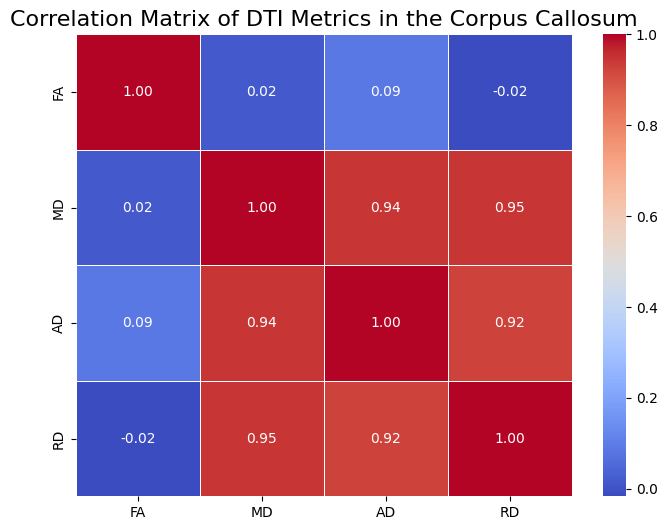

In [22]:
# Select the four key DTI metrics for the corpus callosum from the harmonized data
dti_metrics_df = df[[
    'harmonized_high_fa_volume',
    'harmonized_high_md_volume',
    'harmonized_high_ad_volume',
    'harmonized_high_rd_volume'
]].copy()

# Rename columns for better readability in the plot
dti_metrics_df.columns = ['FA', 'MD', 'AD', 'RD']

# Calculate the correlation matrix
corr_matrix = dti_metrics_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of DTI Metrics in the Corpus Callosum', fontsize=16)
plt.show()

The heatmap shows strong correlations between the DTI metrics. For example, Mean Diffusivity (`MD`) is strongly and positively correlated with both Axial (`AD`) and Radial (`RD`) Diffusivity. Conversely, Fractional Anisotropy (`FA`), a measure of directional coherence, is negatively correlated with `MD` and `RD`. These relationships are expected and demonstrate the internal consistency of the dataset.

## 5. Observations

1.  **Dataset Structure**: The dataset provides a comprehensive table of preclinical TBI data, including subject-level information, experimental groups, and a rich set of DTI metrics for numerous brain regions, with both raw and harmonized values available.

2.  **Data Harmonization**: The application of the NeuroCombat algorithm was effective. Our analysis confirmed that it successfully minimized the technical variance between the three data collection sites, which is crucial for pooling data in multi-center studies.

3.  **Biological Insights**: The harmonized data allowed for a clear visualization of TBI's impact. We reproduced the finding that TBI causes a significant increase in Radial Diffusivity (`RD`) in the Corpus Callosum, a key indicator of white matter damage. This effect was shown to evolve over a period of three months.

4.  **Data Integrity**: The strong, expected correlations between different DTI metrics (e.g., negative correlation between FA and RD) confirm the internal consistency and high quality of the imaging data.

## Conclusion

In this notebook, we successfully loaded and explored the ODC-TBI Harmonized Preclinical Dataset using the `mlcroissant` library. By loading the data via its FAIR² Croissant description, we were able to quickly access and structure it for analysis. Our exploratory analysis replicated several key findings from the associated data article by Gold et al., demonstrating the effectiveness of the data harmonization and the clear biological signals related to traumatic brain injury. This dataset is a valuable, AI-ready resource that can power more robust and reproducible research, ultimately aiding in the discovery and validation of TBI biomarkers.